In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
%matplotlib inline

# Red Wine

### Data analysis

In [2]:
# reading data

df_red = pd.read_csv('winequality-red.csv',sep=";")
df_red['type'] = 'red'

In [3]:
# dataframe
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [4]:
# data information (names of columns, numbers of instances in each column, datatype)
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
# size of the dataframe

df_red.shape

(1599, 13)

In [6]:
# some measurements on the data

df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### As we can see instances with 5 and 6 quality points are more than others. The data is imbalanced 

In [7]:
# number of instances per quality value. 

df_red.quality.value_counts().sort_values(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

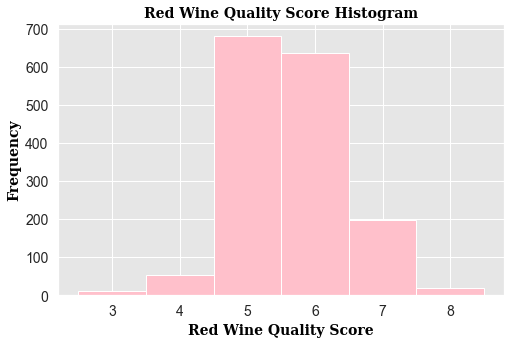

In [8]:
# Red Wine Quality Score Histogram


font_black = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

sns.set()

x_data = set(df_red.quality.values)

f, ax = plt.subplots(figsize=(8,5));

ax.set_facecolor((.9, .9, .9));

plt.hist(df_red.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("Red Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Red Wine Quality Score Histogram",fontdict=font_black);

## Classification

In [9]:
# function to train and predict data
# we need to return 2 values (accuracy and result of confusion matrix) 
# we can seperate the functions of (training and predict) (accuracy and confusion)
# we need also to calculate the accuracy of training data to see overfitting and underfitting.

def run_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train) # trainin model
    
    y_pred = model.predict(X_test) # predicting data
    
    acc = accuracy_score(y_test,y_pred) # accuracy score
    
    result = confusion_matrix(y_test, y_pred) # confusion matrix
    
    #print(result)
    return acc  # return accuracy

In [10]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(df_red.drop(columns=['type','quality']),\
                                                    df_red['quality'], test_size = 0.2, random_state=1)

### K nearest neighbors

In [11]:
# Searching for max accuracy

# We need to add some other parameters (Euclidian) and measure the max accuracy with them as well

max_acc = -1

for k in range(1,100): 
    knb = KNeighborsClassifier(n_neighbors=k)
    
    acc = run_model(knb,X_train, X_test, y_train, y_test)
    
    if acc > max_acc :
        
        max_acc = acc
        k_max=k
        
print(max_acc,k_max)

0.575 1


In [12]:
# Scaling 

# search for parameters of StandardScaler().
# firstly fit or transform.
# look at the homework for visualisation

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### The max acurracy for K neariest neighbor algorithm with the test data is 0.65 and k value 31

In [13]:
# calculating the accuracy after scalinig 

max_acc = -1
acc_list = []

for k in range(1,100): 
    
    knb = KNeighborsClassifier(n_neighbors=k)
    
    acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
    
    acc_list.append(acc)
    
    if acc > max_acc :
        max_acc = acc
        k_max=k
print(max_acc,k_max)

0.65 31


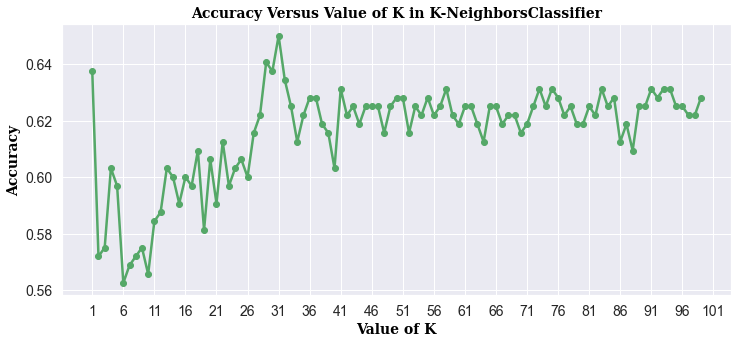

In [14]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);
ax1.plot(range(1,100), acc_list , color='g',linewidth=2.5,marker='o')
plt.xticks(range(1,105,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.show()

### Decision Tree

In [15]:
dt = DecisionTreeClassifier(random_state = 42)
run_model(dt,X_train, X_test, y_train, y_test)

0.64375

In [16]:
rf = RandomForestClassifier(n_estimators = 1001, random_state = 42)
run_model(rf,X_train, X_test, y_train, y_test)

0.721875

In [17]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)
run_model(svc,X_train, X_test, y_train, y_test)

0.609375

## Cross Validation with Random Forest

In [18]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65234375 0.72265625 0.69140625 0.67578125 0.63921569]
mean score: 0.676280637254902


In [19]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.73046875 0.69140625 0.640625   0.70703125 0.62352941 0.67578125
 0.68359375 0.6796875  0.66796875 0.6745098  0.70703125 0.62109375
 0.6796875  0.71875    0.65098039]
mean score: 0.6768096405228757


In [20]:
#param_grid ={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': list(range(500,1250,100))}
#grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
#grid.fit(X_train, y_train)

In [21]:
#best_params = grid.best_params_
#print(best_params)
#best_score = grid.best_score_
#print(best_score)
#{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 
#'min_samples_split': 5, 'n_estimators': 1100}
#best_score = .68

### Regression

In [22]:
def run_reg_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test,y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return (r2,mse)

In [23]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3266402726986811 0.383071981581429


In [24]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.32534380766349535 0.3838095359820613


In [25]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.43934498766534813 0.3189546654644057


In [26]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso ,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.3322760215759385 0.37986582385833695


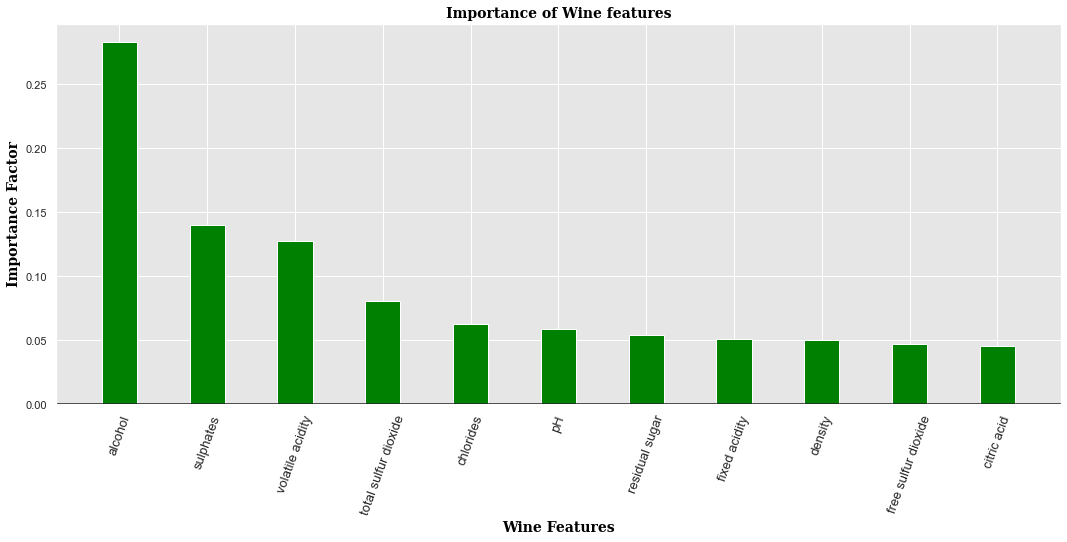

In [27]:
# most releated features(column)

important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)


f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))


plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');

## White wine

In [28]:
df_white = pd.read_csv('winequality-white.csv',sep=";")
df_white['type'] = 'white'
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [29]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
df_white.quality.value_counts().sort_values(ascending=False)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

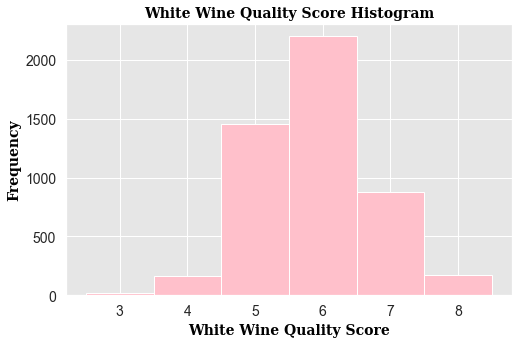

In [31]:
x_data = set(df_white.quality.values)
f, ax = plt.subplots(figsize=(8,5));
ax.set_facecolor((.9, .9, .9));
plt.hist(df_white.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("White Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("White Wine Quality Score Histogram",fontdict=font_black);

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_white.drop(columns=['type','quality']),\
                                                    df_white['quality'], test_size = 0.2, random_state=1)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
max_acc = -1
acc_list = []
for k in range(1,100): 
    knb = KNeighborsClassifier(n_neighbors=k)
    acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
    acc_list.append(acc)
    if acc > max_acc :
        max_acc = acc
        k_max=k
print(max_acc,k_max)

0.6561224489795918 1


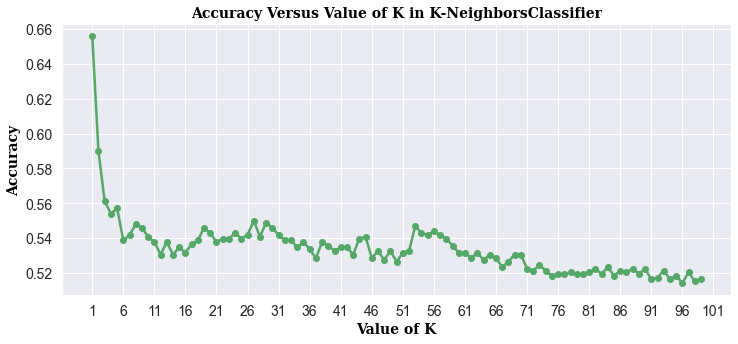

In [34]:
fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);
ax1.plot(range(1,100), acc_list , color='g',linewidth=2.5,marker='o')
plt.xticks(range(1,105,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.show()

In [35]:
dt = DecisionTreeClassifier(random_state = 42)
run_model(dt,X_train, X_test, y_train, y_test)

0.6071428571428571

In [36]:
rf = RandomForestClassifier(n_estimators = 1001, random_state = 42)
run_model(rf,X_train, X_test, y_train, y_test)

0.6887755102040817

In [37]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)
run_model(svc,X_train, X_test, y_train, y_test)

0.5653061224489796

In [38]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65688776 0.66581633 0.65816327 0.67816092 0.66411239]
mean score: 0.6646281309458649


In [39]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.67219388 0.67857143 0.63903061 0.67816092 0.68326948 0.68112245
 0.66326531 0.66326531 0.68199234 0.62707535 0.65433673 0.65816327
 0.6619898  0.65261814 0.65006386]
mean score: 0.6630079234759038


In [ ]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': list(range(500,1250,100))}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 3168 candidates, totalling 9504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 27.2min


In [ ]:
best_params = grid.best_params_
print(best_params)
best_score = grid.best_score_
print(best_score)

- {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
- 0.6454823889739663

### Regression

In [ ]:
columns = df_white.columns
columns = list(columns)
columns.remove('type')
columns.remove('quality')
sns.pairplot(df_white,x_vars=columns,y_vars=["quality"],height=2);

In [ ]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

In [ ]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

In [ ]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso,X_train, X_test, y_train, y_test)
print(r2 , mse)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

In [ ]:
important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)
important_feature

In [ ]:
f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))
plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');